In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


Parameters:
30cm x 10cm x 4 solar panels
90% of simulated value light

In [15]:
df = pd.read_csv('OutputsCharging.txt', sep=r'\t+')
df2 = pd.read_csv('SolarPower_PanelPower.Fixed.txt', sep=r'\s\s+')
df3 = pd.read_csv('SolarPower_ShadowTimes_Fixed.txt', sep=r'\s\s+')
access = pd.read_csv('intvls.csv')

C:\Users\tonyh\AppData\Local\Temp\ipykernel_26384\2507890478.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('OutputsCharging.txt', sep=r'\t+')
C:\Users\tonyh\AppData\Local\Temp\ipykernel_26384\2507890478.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('SolarPower_PanelPower.Fixed.txt', sep=r'\s\s+')
C:\Users\tonyh\AppData\Local\Temp\ipykernel_26384\2507890478.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid thi

In [4]:
df2['SolarSat.EpochText'] = pd.to_datetime(df2['SolarSat.EpochText'])
df['SolarSat.EpochText'] = pd.to_datetime(df2['SolarSat.EpochText'])
df3['Entry Epoch'] = pd.to_datetime(df3['Entry Epoch'])
df3['Exit Epoch'] = pd.to_datetime((df3['Exit Epoch']))

In [5]:
df.rename(columns={'PanelPower': 'PanelPower(Charging)'}, inplace=True)
df2.rename(columns={'PanelPower': 'PanelPower(Nadir)'}, inplace=True)

In [6]:
merge = pd.merge(df,df2, how='inner', on='SolarSat.EpochText')

In [7]:
merge = merge.drop(columns=['SolarSat.Range(Sun)', 'Area'])
merge

,SolarSat.EpochText,SunPanelAngle_x,SolarSat.Range(Sun) (km),PanelPower(Charging),SunPanelAngle_y,PanelPower(Nadir)
0,2022-08-23 08:57:57.785184,78.849,1.512897e+08,28.881,78.849,28.881
1,2022-08-23 08:59:27.785184,78.849,1.512896e+08,28.881,78.848,28.883
2,2022-08-23 09:00:57.785184,78.961,1.512895e+08,28.596,87.326,6.968
3,2022-08-23 09:02:27.785184,79.166,1.512895e+08,28.071,91.079,2.811
4,2022-08-23 09:03:57.785184,79.446,1.512894e+08,27.353,97.884,20.483
...,...,...,...,...,...,...
172795,2023-02-19 08:50:27.785184,82.408,1.505680e+08,19.637,72.619,43.606
172796,2023-02-19 08:51:57.785184,83.049,1.505679e+08,17.988,77.554,31.459
172797,2023-02-19 08:53:27.785184,83.690,1.505678e+08,16.336,82.529,18.981
172798,2023-02-19 08:54:57.785184,84.331,1.505677e+08,14.682,87.526,6.301


In [8]:
merge.rename(columns={'SolarSat.EpochText': 'Epoch', 'SunPanelAngle_x': 'PanelAngle(Charging)', 'SunPanelAngle_y': 'PanelAngle(Nadir)'}, inplace=True)

<AxesSubplot:>

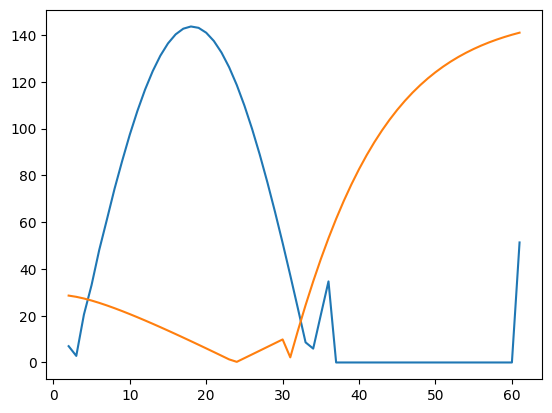

In [9]:
start_time = datetime.strptime('2022-08-23 09:00:00','%Y-%m-%d %H:%M:%S')
end_time = start_time + timedelta(minutes=90)
test = merge[merge['Epoch'].between(start_time,end_time)]
test['PanelPower(Nadir)'].plot.line(x='Epoch', y='PanelPower(Nadir)')
test['PanelPower(Charging)'].plot.line(x='Epoch', y='PanelPower(Charging))')

<AxesSubplot:>

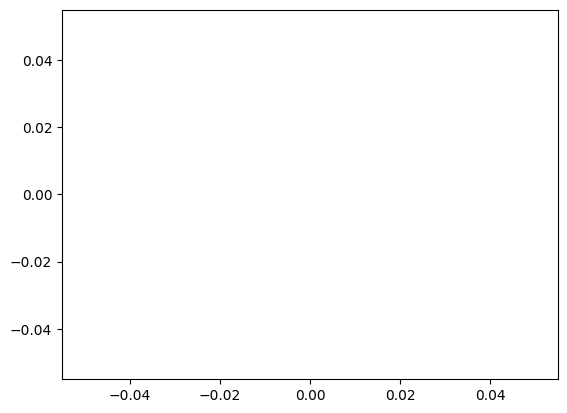

In [10]:
start_time2 = datetime.strptime('2022-09-23 09:00:00','%Y-%m-%d %H:%M:%S')
end_time2 = start_time + timedelta(minutes=90)
test2 = merge[merge['Epoch'].between(start_time2,end_time2)]
test2['PanelPower(Nadir)'].plot.line()
test2['PanelPower(Charging)'].plot.line()

<AxesSubplot:ylabel='Density'>

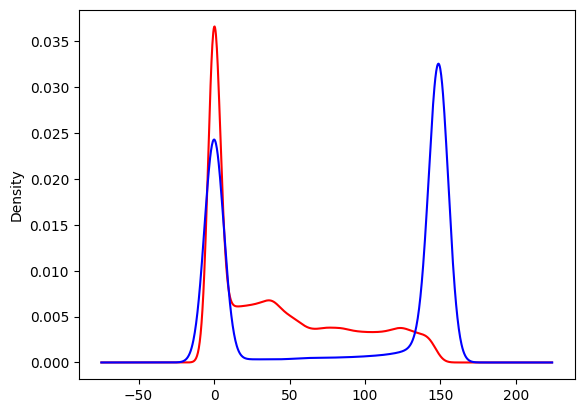

In [11]:
merge['PanelPower(Nadir)'].plot.kde(color='red')
merge['PanelPower(Charging)'].plot.kde(color='blue')

In [12]:
daily = merge.set_index('Epoch').resample('1D').mean()
daily

,PanelAngle(Charging),SolarSat.Range(Sun) (km),PanelPower(Charging),PanelAngle(Nadir),PanelPower(Nadir)
Epoch,,,,,
2022-08-23,12.263895,1.512874e+08,80.718784,104.826105,50.330065
2022-08-24,11.776153,1.512841e+08,86.675243,104.597220,48.843927
2022-08-25,21.305508,1.512805e+08,88.484203,105.997630,50.718779
2022-08-26,9.085645,1.512785e+08,76.985593,105.421706,49.743721
2022-08-27,1.394682,1.512748e+08,82.193249,106.388387,51.061928
...,...,...,...,...,...
2023-02-15,2.787746,1.505852e+08,79.715508,95.765922,34.694122
2023-02-16,1.389010,1.505803e+08,83.838367,96.517159,35.983534
2023-02-17,2.786261,1.505748e+08,103.712122,98.937481,39.737728


In [13]:
daily['PanelPower(Nadir)'].max()

51.061928125

In [14]:
df3['Duration(min)'].max()

36.310546875

In [19]:
access

,Source,Target,IntervalNumber,StartTime,EndTime,Duration,StartOrbit,EndOrbit
0,ISS (ZARYA),Ground station 2,1,30-Nov-2020 22:55:24,30-Nov-2020 23:05:24,600,1,1
1,ISS (ZARYA),Ground station 2,2,01-Dec-2020 00:33:24,01-Dec-2020 00:41:24,480,2,2
2,ISS (ZARYA),Ground station 2,3,01-Dec-2020 15:47:24,01-Dec-2020 15:57:24,600,12,12
3,ISS (ZARYA),Ground station 2,4,01-Dec-2020 17:24:24,01-Dec-2020 17:34:24,600,13,13
4,ISS (ZARYA),Ground station 2,5,01-Dec-2020 19:02:24,01-Dec-2020 19:12:24,600,14,14
...,...,...,...,...,...,...,...,...
4681,ISS (ZARYA),Ground station 2,4682,31-Oct-2022 06:50:24,31-Oct-2022 07:00:24,600,10838,10838
4682,ISS (ZARYA),Ground station 2,4683,31-Oct-2022 08:27:24,31-Oct-2022 08:37:24,600,10839,10839
4683,ISS (ZARYA),Ground station 2,4684,31-Oct-2022 10:04:24,31-Oct-2022 10:14:24,600,10840,10840
4684,ISS (ZARYA),Ground station 2,4685,31-Oct-2022 11:41:24,31-Oct-2022 11:51:24,600,10841,10841


In [20]:
access['StartTime'] = pd.to_datetime(access['StartTime'])
access['EndTime'] = pd.to_datetime(access['EndTime'])
access.dtypes

Source                    object
Target                    object
IntervalNumber             int64
StartTime         datetime64[ns]
EndTime           datetime64[ns]
Duration                   int64
StartOrbit                 int64
EndOrbit                   int64
dtype: object

In [39]:
access.drop([0])

,Source,Target,IntervalNumber,StartTime,EndTime,Duration,StartOrbit,EndOrbit
1,ISS (ZARYA),Ground station 2,2,2020-12-01 00:33:24,2020-12-01 00:41:24,480,2,2
2,ISS (ZARYA),Ground station 2,3,2020-12-01 15:47:24,2020-12-01 15:57:24,600,12,12
3,ISS (ZARYA),Ground station 2,4,2020-12-01 17:24:24,2020-12-01 17:34:24,600,13,13
4,ISS (ZARYA),Ground station 2,5,2020-12-01 19:02:24,2020-12-01 19:12:24,600,14,14
5,ISS (ZARYA),Ground station 2,6,2020-12-01 20:40:24,2020-12-01 20:50:24,600,15,15
...,...,...,...,...,...,...,...,...
4681,ISS (ZARYA),Ground station 2,4682,2022-10-31 06:50:24,2022-10-31 07:00:24,600,10838,10838
4682,ISS (ZARYA),Ground station 2,4683,2022-10-31 08:27:24,2022-10-31 08:37:24,600,10839,10839
4683,ISS (ZARYA),Ground station 2,4684,2022-10-31 10:04:24,2022-10-31 10:14:24,600,10840,10840
4684,ISS (ZARYA),Ground station 2,4685,2022-10-31 11:41:24,2022-10-31 11:51:24,600,10841,10841


In [41]:
daily_access = access.set_index('StartTime').resample('1D').count()
daily_access['Target'].mean()

6.684736091298146